# CNN training on entire CNV by 3 classes

In [1]:
import os
import re
import copy
import random
import datetime

import pandas as pd

import PIL
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import sklearn

from __future__ import print_function
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
from tensorflow import keras
import keras.preprocessing
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend

import function_dl as func_dl
import function as func

%load_ext autoreload
%autoreload 2

Tensorflow version 2.2.0
Tensorflow version 2.2.0


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
physical_devices

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
img_width, img_height = 224, 224
seed = 2021

## Importing data from scratch

### Import file path

In [ ]:
## For rare CNVs
# path = '/home/rt2776/cnv_espresso/images_rare_3classes/0-entire_cnv_file_list/'
# true_del_file  = path + 'true_del_image_info.list'
# false_del_file = path + 'false_del_image_info.list'

# true_dup_file  = path + 'true_dup_image_info.list'
# false_dup_file = path + 'false_dup_image_info.list'

# true_del_df  = pd.read_csv(true_del_file,  header=0,sep='\t')
# false_del_df = pd.read_csv(false_del_file, header=0,sep='\t')

# true_dup_df  = pd.read_csv(true_dup_file,  header=0,sep='\t')
# false_dup_df = pd.read_csv(false_dup_file, header=0,sep='\t')

# true_del_images_path_list  = true_del_df['image_path']
# false_del_images_path_list = false_del_df['image_path']

# true_dup_images_path_list  = true_dup_df['image_path']
# false_dup_images_path_list = false_dup_df['image_path']

In [ ]:
## For file with image path only:

# true_list = [each_file[0] for each_file in fileToList(true_file)]
# false_list = [each_file[0] for each_file in fileToList(false_file)]
# len(true_list), len(false_list)

In [ ]:
# true_del_images_path_list.shape, false_del_images_path_list.shape, true_dup_images_path_list.shape, false_dup_images_path_list.shape

### Loading images from list to numpy array

In [ ]:
# # entire cnv
# true_del_img_np = loadImgs(true_del_images_path_list, img_width, img_height)
# true_del_img_np.shape

# false_del_img_np = loadImgs(false_del_images_path_list, img_width, img_height)
# false_del_img_np.shape

# true_dup_img_np = loadImgs(true_dup_images_path_list, img_width, img_height)
# true_dup_img_np.shape

# false_dup_img_np = loadImgs(false_dup_images_path_list, img_width, img_height)
# false_dup_img_np.shape

### Generate labels for entire CNVs

In [ ]:
# # Four classes
# true_del_label = [0 for i in range(0,len(true_del_img_np))]
# false_del_label = [1 for i in range(0,len(false_del_img_np))]

# true_dup_label = [3 for i in range(0,len(true_dup_img_np))]
# false_dup_label = [2 for i in range(0,len(false_dup_img_np))]

# print(true_del_label[0:5], false_del_label[0:5], true_dup_label[0:5], false_dup_label[0:5])
# print(len(true_del_label), len(false_del_label), len(true_dup_label), len(false_dup_label))

In [ ]:
# # Three classes
# true_del_label = [0 for i in range(0,len(true_del_img_np))]
# false_del_label = [1 for i in range(0,len(false_del_img_np))]

# true_dup_label = [2 for i in range(0,len(true_dup_img_np))]
# false_dup_label = [1 for i in range(0,len(false_dup_img_np))]

# print(true_del_label[0:5], false_del_label[0:5], true_dup_label[0:5], false_dup_label[0:5])
# print(len(true_del_label), len(false_del_label), len(true_dup_label), len(false_dup_label))

### Combine true & false data for entire CNVs

In [ ]:
# combined_cnv_info_df = true_del_df.append(false_del_df, ignore_index=True)
# combined_cnv_info_df = combined_cnv_info_df.append(true_dup_df, ignore_index=True)
# combined_cnv_info_df = combined_cnv_info_df.append(false_dup_df, ignore_index=True)

In [ ]:
# combined_img_np = np.vstack((true_del_img_np, false_del_img_np, true_dup_img_np, false_dup_img_np))

In [ ]:
# combined_label = true_del_label + false_del_label + true_dup_label + false_dup_label
# len(combined_label)

## Backup or restore data

- Backup

In [ ]:
## Backup

# backup_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/'
# os.makedirs(backup_path, exist_ok=True)

# project_name = 'rare_entire_del'
# combined_cnv_info_df.to_csv(backup_path+'rare_del_entire_cnv_info.csv')
# np.save(backup_path+'rare_del_entire_img', combined_img_np)
# np.save(backup_path+'rare_del_entire_label', combined_label)

# project_name = 'rare_entire_dup'
# combined_cnv_info_df.to_csv(backup_path+'rare_entire_dup_info.csv')
# np.save(backup_path+'rare_entire_dup_img', combined_img_np)
# np.save(backup_path+'rare_entire_dup_label', combined_label)

# project_name = 'rare_entire_cnv'
# combined_cnv_info_df.to_csv(backup_path+'rare_entire_cnv_info.csv')
# np.save(backup_path+'rare_entire_cnv_img', combined_img_np)
# np.save(backup_path+'rare_entire_cnv_label_'+str(len(np.unique(combined_label)))+'classes', combined_label)

- Restore

In [4]:
backup_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/'
## Restore for entire del or dup

# project_name = 'rare_entire_del'
# project_name = 'rare_entire_dup'
project_name = 'rare_entire_cnv'
nClasses = 3
if project_name == 'rare_entire_del' or project_name == 'rare_entire_dup' or project_name == 'rare_entire_cnv':
    combined_img = np.load(backup_path + project_name + '_img.npy')
    combined_label = np.load(backup_path+'rare_entire_cnv_label_'+str(nClasses)+'classes'+ '.npy')
    combined_cnv_info_df = pd.read_csv(backup_path+project_name+'_info.csv')

In [5]:
print("Project: '%s' dataset loaded."%project_name)
print("  -- Shape of image array: ", combined_img.shape)
print("  -- Shape of label      : ", combined_label.shape)
try:
    print("  -- Shape of CNV info   : ", combined_cnv_info_df.shape)
except:
    print("There is no CNV info data for split del or dup.")

Project: 'rare_entire_cnv' dataset loaded.
  -- Shape of image array:  (22008, 224, 224, 3)
  -- Shape of label      :  (22008,)
  -- Shape of CNV info   :  (22008, 22)


## Normalization

In [6]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = combined_img.shape[1:]
input_shape = (nRows, nCols, nDims)
print("The shape of input tensor:",input_shape)

The shape of input tensor: (224, 224, 3)


In [7]:
# Change to float datatype
combined_img = combined_img.astype('float32')

# Scale the data to lie between 0 to 1
combined_img /= 255

# Change the labels from integer to categorical data
combined_label_one_hot = to_categorical(combined_label)

In [8]:
np.unique(combined_label)

array([0, 1, 2])

## Find the unique numbers from the train labels

In [9]:
classes = np.unique(combined_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("4 classes label: 0-True del; 1-False del; 2-False dup; 3-True dup")
print("3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup")

Total number of outputs :  3
Output classes :  [0 1 2]
4 classes label: 0-True del; 1-False del; 2-False dup; 3-True dup
3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup


In [10]:
#np.where(train_label==0)

2
[[1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.78431374 0.78431374 1.        ]
 [0.06666667 0.06666667 0.9019608 ]]


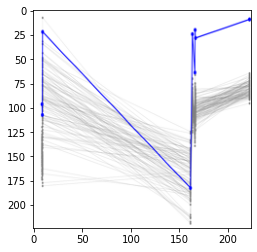

In [11]:
item = random.randint(0,len(combined_label))
#item = 110 
print(combined_label[item])
func_dl.showImg(combined_img[item])
print(combined_img[item][100][0:10])

## Train the deep nerual model by Hold-out validation
- Ref: https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529
### Split dataset into training(80%) and testing(20%) dataset

In [12]:
project_name

'rare_entire_cnv'

In [13]:
## split image arrays
if project_name == 'rare_entire_cnv' or project_name == 'rare_entire_del' or project_name == 'rare_entire_dup':
    train_img, test_img, train_label, test_label, train_cnv_info_df, test_cnv_info_df = train_test_split(combined_img,
                                                                                                        combined_label_one_hot,
                                                                                                        combined_cnv_info_df,
                                                                                                        test_size=0.2,
                                                                                                        shuffle=True,
                                                                                                        random_state=seed)

    train_img, val_img, train_label, val_label, train_cnv_info_df, val_cnv_info_df = train_test_split(train_img,
                                                                                                      train_label,
                                                                                                      train_cnv_info_df,
                                                                                                      test_size=0.25,
                                                                                                      shuffle=True,
                                                                                                      random_state=seed) # 0.25*0.8=0.2

combined_img.shape, train_img.shape, val_img.shape, test_img.shape
combined_label_one_hot.shape, train_label.shape, val_label.shape, test_label.shape

((22008, 3), (13204, 3), (4402, 3), (4402, 3))

Label: 0-True del; 1-False del; 2-False dup; 3-True dup
3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


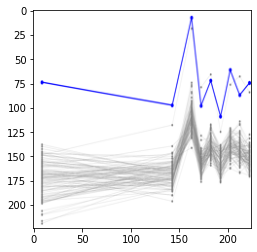

In [14]:
i=random.randrange(len(train_img))
## if the the images are different, then it means it has been shuffled.
print("Label: 0-True del; 1-False del; 2-False dup; 3-True dup")
print("3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup")
func_dl.showImg(train_img[i]),train_label[i]#,train_cnv_info_df.iloc[i,:],train_cnv_info_df.iloc[i,20]
print(train_img[i][100][80:100])

In [15]:
test_img.shape, test_label.shape, test_cnv_info_df.shape

((4402, 224, 224, 3), (4402, 3), (4402, 22))

In [16]:
np.min(test_cnv_info_df['NUM_TARGETS']), np.max(test_cnv_info_df['NUM_TARGETS'])

(1, 513)

In [17]:
test_cnv_info_df[test_cnv_info_df['NUM_TARGETS']<4]

,Unnamed: 0,CHR,PRED_START,PRED_END,TYPE,SAMPLE,CANOES_RT,CLAMMS_RT,XHMM_RT,NUM_OVERLAPS_RT,...,PRED_SIZE,MAP,NUM_TARGETS,SIZE_LABEL,LABEL_VAL,ref,batch,Num_Carriers(inGivenCohort),Num_Targets_Wins,image_path
8119,8119,6,27400370,27456921,DUP,SP0029239,1.0,1.00,1.0,3,...,56551,1.00,3,F)50KB-75KB,1,hg38,spark3,1,6,/home/rt2776/cnv_espresso/images_rare_3classes...
17649,17649,17,41836342,41837588,DUP,SP0040215,0.0,0.00,1.0,1,...,1246,1.00,3,B)1KB-5KB,0,hg38,spark3,56,3,/home/rt2776/cnv_espresso/images_rare_3classes...
6045,6045,4,129093069,129106647,DEL,SP0125643,1.0,0.00,0.0,1,...,13578,1.00,3,D)10KB-25KB,0,hg38,spark9,0,3,/home/rt2776/cnv_espresso/images_rare_3classes...
6958,6958,13,75537381,75537805,DUP,SP0013148,0.0,1.00,1.0,2,...,424,1.00,3,A)<1KB,1,hg38,spark1,136,3,/home/rt2776/cnv_espresso/images_rare_3classes...
13987,13987,5,178120177,178122001,DUP,SP0107699,0.0,1.00,1.0,2,...,1824,1.00,3,B)1KB-5KB,1,hg38,spark9,1,3,/home/rt2776/cnv_espresso/images_rare_3classes...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,9370,19,57813293,57819946,DUP,SP0044377,0.0,0.81,1.0,2,...,6653,0.97,3,C)5KB-10KB,1,hg38,spark4,110,3,/home/rt2776/cnv_espresso/images_rare_3classes...
1812,1812,9,113049361,113056688,DEL,SP0046136,1.0,1.00,1.0,3,...,7327,1.00,3,C)5KB-10KB,1,hg38,spark4,34,3,/home/rt2776/cnv_espresso/images_rare_3classes...
11197,11197,6,32641309,32642764,DUP,SP0066994,0.0,0.00,1.0,1,...,1455,0.94,3,B)1KB-5KB,1,hg38,spark6,2,3,/home/rt2776/cnv_espresso/images_rare_3classes...
6051,6051,3,48576248,48576557,DEL,SP0126058,0.0,0.00,1.0,1,...,309,1.00,3,A)<1KB,0,hg38,spark9,0,3,/home/rt2776/cnv_espresso/images_rare_3classes...


## Visulize training and testing dataset
- In order to check the performance in different size categories (number of windows/targets), we need to check the distribution of CNVs in training and testing set.

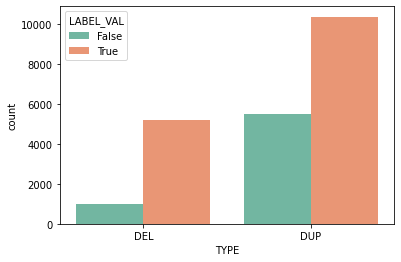

In [54]:
sns.countplot(x="TYPE", data=combined_cnv_info_df.sort_values(by='TYPE'), hue="LABEL_VAL",palette="Set2")
plt.legend(title='LABEL_VAL', loc='upper left', labels=['False','True'])

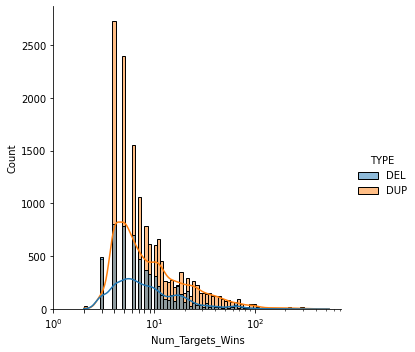

In [55]:
## all the data
output_figure_path = '/home/rt2776/cnv_espresso/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'combined_entire_cnv_num_targets_wins.png'

fig = sns.displot(data=combined_cnv_info_df.sort_values(by='TYPE')
                  , x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.savefig(output_figure_file, facecolor='w', edgecolor='w', bbox_inches = 'tight',dpi=150)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

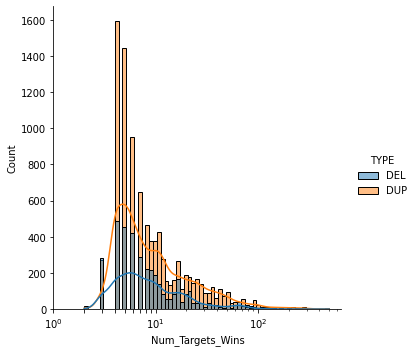

In [56]:
## training data
output_figure_path = '/home/rt2776/cnv_espresso/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'train_entire_cnv_num_targets_wins.png'

fig = sns.displot(data=train_cnv_info_df.sort_values(by='TYPE')
                  , x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.savefig(output_figure_file, facecolor='w', edgecolor='w', bbox_inches = 'tight',dpi=150)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

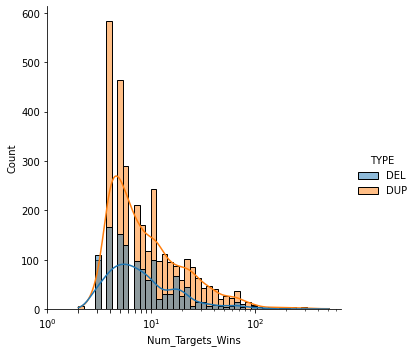

In [57]:
## validation data
output_figure_path = '/home/rt2776/cnv_espresso/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'validation_entire_cnv_num_targets_wins.png'

fig = sns.displot(data=val_cnv_info_df.sort_values(by='TYPE')
                  , x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.savefig(output_figure_file, facecolor='w', edgecolor='w', bbox_inches = 'tight',dpi=150)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

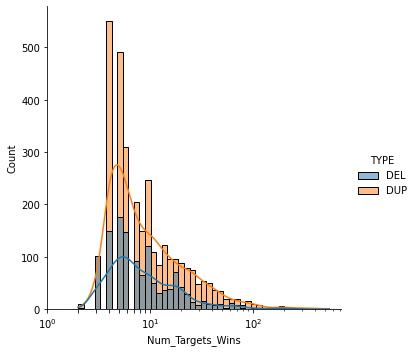

In [103]:
## testing data
output_figure_path = '/home/rt2776/cnv_espresso/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'test_entire_cnv_num_targets_wins.png'

fig = sns.displot(data=test_cnv_info_df.sort_values(by='TYPE')
                  , x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.savefig(output_figure_file, facecolor='w', edgecolor='w', bbox_inches = 'tight',dpi=150)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

In [128]:
test_cnv_info_df

,Unnamed: 0,CHR,PRED_START,PRED_END,TYPE,SAMPLE,CANOES_RT,CLAMMS_RT,XHMM_RT,NUM_OVERLAPS_RT,...,PRED_SIZE,MAP,NUM_TARGETS,SIZE_LABEL,LABEL_VAL,ref,batch,Num_Carriers(inGivenCohort),Num_Targets_Wins,image_path
11380,11380,17,623532,1012797,DUP,SP0069616,1.0,1.00,1.0,3,...,389265,0.99,56,I)250KB-500KB,1,hg38,spark6,3,61,/home/rt2776/cnv_espresso/images_rare_3classes...
8247,8247,12,52301814,52385585,DUP,SP0031077,1.0,0.95,1.0,3,...,83771,0.99,36,G)75KB-100KB,1,hg38,spark3,72,36,/home/rt2776/cnv_espresso/images_rare_3classes...
8589,8589,1,20682652,20713555,DUP,SP0034528,0.0,1.00,1.0,2,...,30903,0.99,9,E)25KB-50KB,1,hg38,spark3,2,9,/home/rt2776/cnv_espresso/images_rare_3classes...
5591,5591,19,1090907,1110888,DEL,SP0057160,1.0,0.00,0.0,1,...,19981,1.00,19,D)10KB-25KB,0,hg38,spark5,0,19,/home/rt2776/cnv_espresso/images_rare_3classes...
21068,21068,1,46609654,46615076,DUP,SP0121823,0.0,0.00,1.0,1,...,5422,1.00,4,C)5KB-10KB,0,hg38,spark9,0,4,/home/rt2776/cnv_espresso/images_rare_3classes...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12326,12326,13,113088326,113149517,DUP,SP0082351,1.0,1.00,1.0,3,...,61191,0.99,26,F)50KB-75KB,1,hg38,spark7,3,27,/home/rt2776/cnv_espresso/images_rare_3classes...
4256,4256,1,12847407,12861779,DEL,SP0112124,0.0,1.00,1.0,2,...,14372,0.92,4,D)10KB-25KB,1,hg38,spark9,27,4,/home/rt2776/cnv_espresso/images_rare_3classes...
19932,19932,17,43940927,43953009,DUP,SP0095278,0.0,1.00,0.0,1,...,12082,1.00,4,D)10KB-25KB,0,hg38,spark8,94,4,/home/rt2776/cnv_espresso/images_rare_3classes...
15232,15232,5,79079368,79088574,DUP,SP0128692,1.0,1.00,1.0,3,...,9206,0.99,6,C)5KB-10KB,1,hg38,spark10,58,6,/home/rt2776/cnv_espresso/images_rare_3classes...


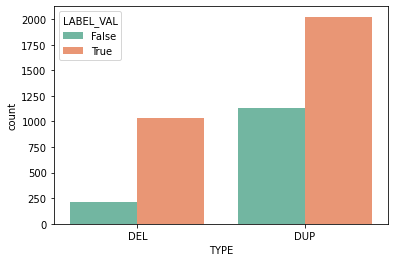

In [170]:
sns.countplot(x="TYPE", data=test_cnv_info_df.sort_values(by='TYPE'), hue="LABEL_VAL",palette="Set2")
plt.legend(title='LABEL_VAL', loc='upper left', labels=['False','True'])

In [21]:
model_dir = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/'

### MobileNet v1. use its architecture and set all the weights trainable

In [305]:
model_name='MobileNet_v1'
print("Model name: %s"%model_name)
model = func_dl.cnn_model(model_name, nClasses)
model.summary()
func.showDateTime()

Model name: MobileNet_v1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1000)              4253864   
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 1539      
Total params: 4,767,915
Trainable params: 4,746,027
Non-trainable params: 21,888
_________________________________________________________________
[2021.02.19-09:26:59]


In [22]:
model_name='MobileNet_v1_classic_tsf'
model = func_dl.transfer_learning_model("MobileNet_v1",nClasses,trainable=True)
model.summary()

Model name: MobileNet_v1, nClasses: 3, Trainable: True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [368]:
print("Training by MobileNet_v1 model ...")
batch_size = 100
epochs = 10
model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc])
## easy to exhaust the memory by using "validation_split = 0.2"
print("\n")
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)

Training by MobileNet_v1 model ...
Epoch 1/10
132/133 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9955 - f1_m: 0.9955 - precision_m: 0.9955 - recall_m: 0.9955
Epoch 00001: val_accuracy improved from -inf to 0.90527, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_classic_tsf_3classes.h5
133/133 [==============================] - 74s 554ms/step - loss: 0.0142 - accuracy: 0.9955 - f1_m: 0.9955 - precision_m: 0.9956 - recall_m: 0.9955 - val_loss: 0.6023 - val_accuracy: 0.9053 - val_f1_m: 0.8962 - val_precision_m: 0.8966 - val_recall_m: 0.8958
Epoch 2/10
132/133 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9939 - f1_m: 0.9939 - precision_m: 0.9939 - recall_m: 0.9939
Epoch 00002: val_accuracy improved from 0.90527 to 0.91913, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_classic_tsf_3classes.h5
133/133 [===

In [369]:
print("Model_name:",model_name)
print("loss:",loss, "\naccuracy:",accuracy, "\nf1_score:",f1_score, "\nprecision:",precision, "\nrecall:",recall)

Model_name: MobileNet_v1_classic_tsf
loss: 0.678913414478302 
accuracy: 0.9104952216148376 
f1_score: 0.9107285737991333 
precision: 0.9110403060913086 
recall: 0.9104267358779907


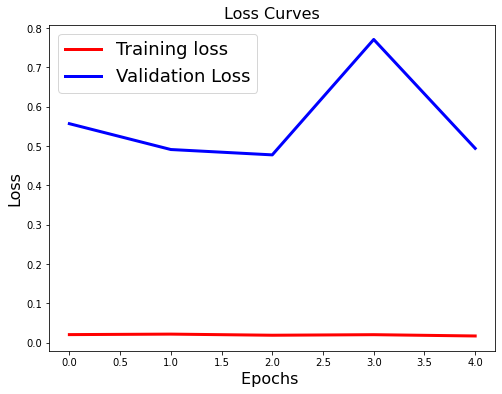

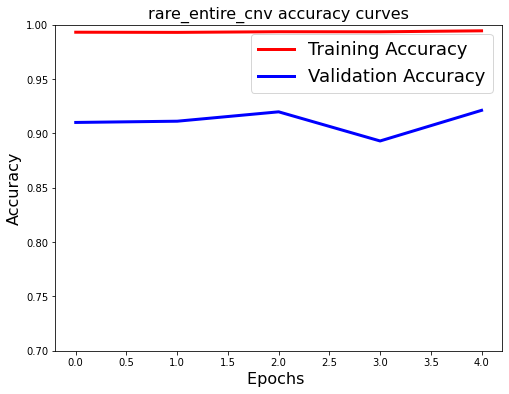

In [365]:
func_dl.draw_loss_accuracy_curves(history, project_name)


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup


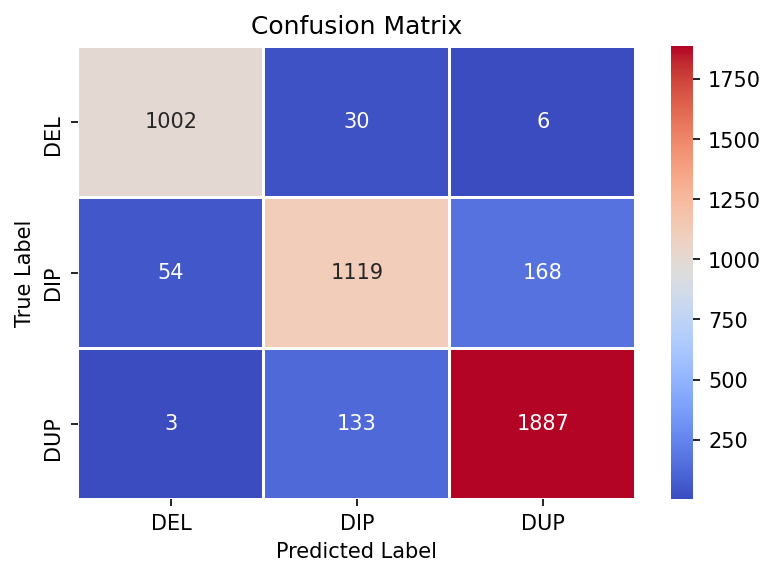


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1038
           1       0.87      0.83      0.85      1341
           2       0.92      0.93      0.92      2023

    accuracy                           0.91      4402
   macro avg       0.91      0.91      0.91      4402
weighted avg       0.91      0.91      0.91      4402



In [370]:
func_dl.confusion_matrix(model, test_img, test_label, nClasses)

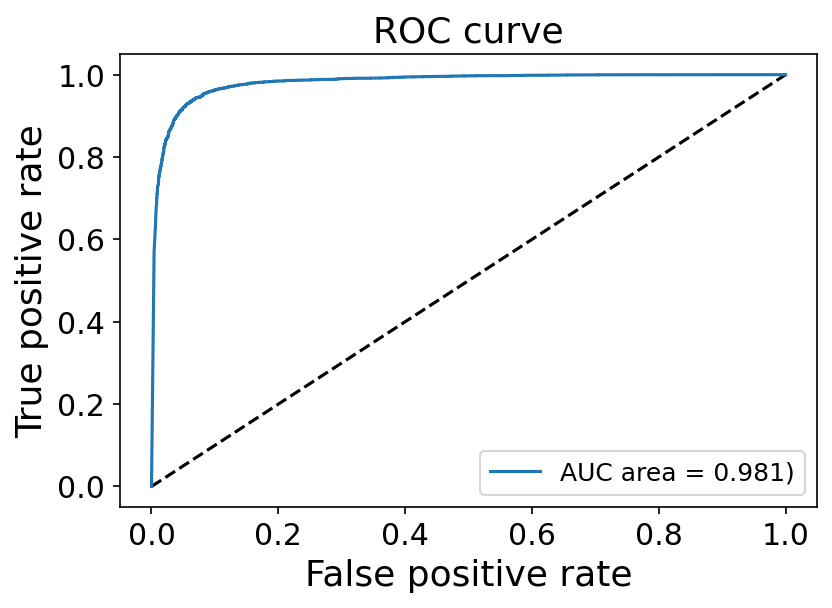

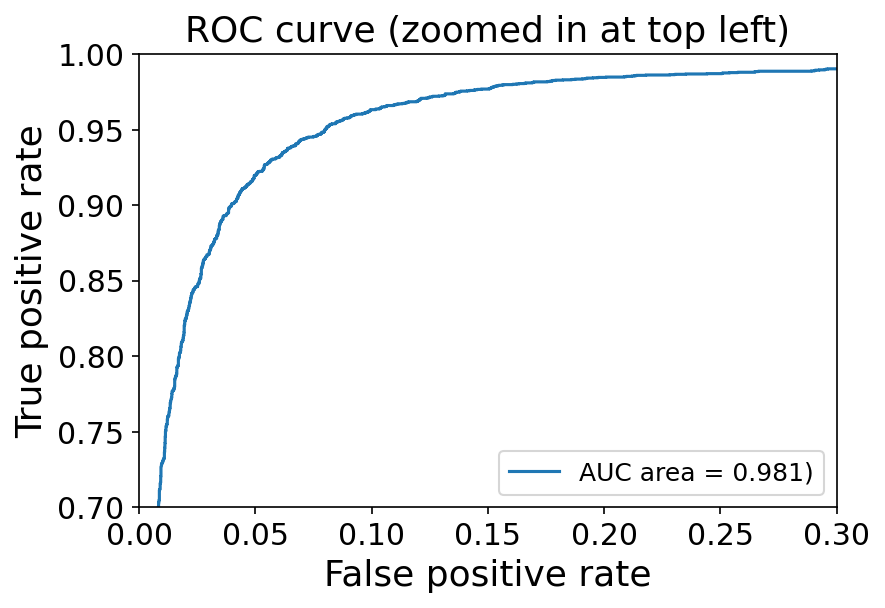

In [372]:
fpr, tpr, thresholds, auc = func_dl.pred_roc_data(model, test_img, test_label)
func_dl.draw_single_roc_curve(tpr, fpr, auc)

In [ ]:
# output model metrics
output_file = model_dir + project_name + "_" + model_name + "_model_metrics.txt"
output_model_metrics(model_name, loss, accuracy, f1_score, precision, recall, output_file)
func.showDateTime()

### MobileNet v1. transfer learning and fine tuning
- Firstly, we keep all the weights of base model frozen to train the fc layers.

In [33]:
model_name='MobileNet_v1_fine-tuning'
base_model = tf.keras.applications.MobileNet(
weights='imagenet',  # Load weights pre-trained model.
input_shape=(224, 224, 3),    #input_shape=(224, 224, 3),
include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False
inputs = keras.Input(shape=(224, 224, 3)) #keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(nClasses,activation='softmax')(x)      
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [35]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy', func_dl.f1_m, func_dl.precision_m, func_dl.recall_m])

In [51]:
print("Training by MobileNet_v1 model ...")
batch_size = 32
epochs = 20
model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc])
## easy to exhaust the memory by using "validation_split = 0.2"
print("\n")
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)

Training by MobileNet_v1 model ...
Epoch 1/20
413/413 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.9438 - f1_m: 0.9439 - precision_m: 0.9448 - recall_m: 0.9430
Epoch 00001: val_accuracy improved from -inf to 0.88914, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5
413/413 [==============================] - 79s 190ms/step - loss: 0.1434 - accuracy: 0.9438 - f1_m: 0.9439 - precision_m: 0.9448 - recall_m: 0.9430 - val_loss: 0.2768 - val_accuracy: 0.8891 - val_f1_m: 0.8894 - val_precision_m: 0.8903 - val_recall_m: 0.8885
Epoch 2/20
413/413 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9520 - f1_m: 0.9517 - precision_m: 0.9522 - recall_m: 0.9513
Epoch 00002: val_accuracy improved from 0.88914 to 0.92299, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5
413/413 [===


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup


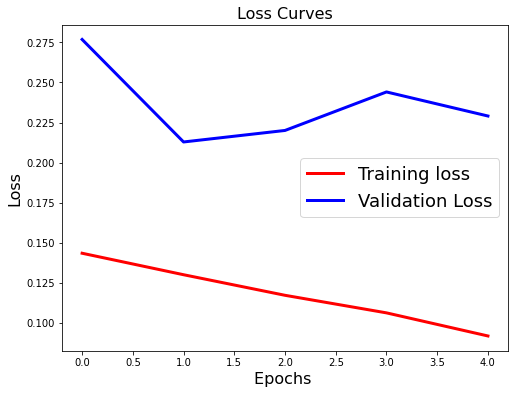

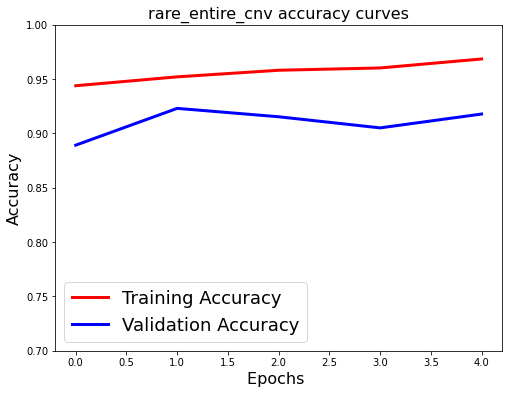

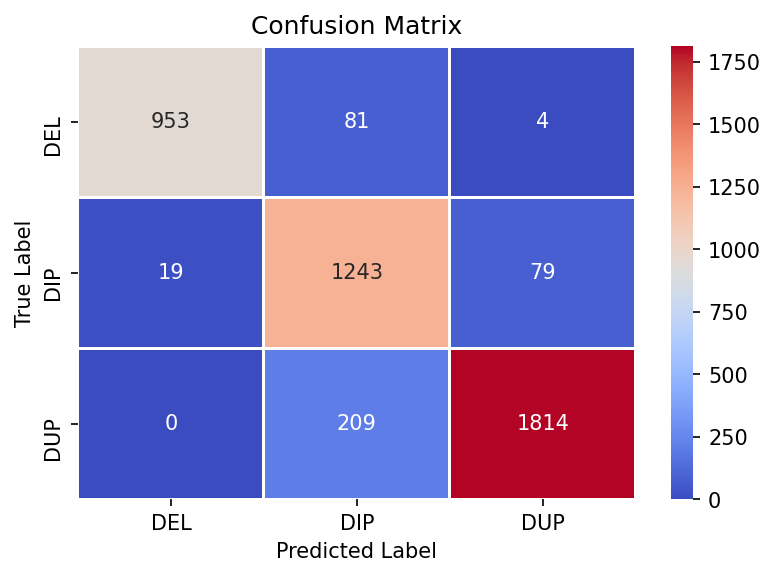


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1038
           1       0.81      0.93      0.86      1341
           2       0.96      0.90      0.93      2023

    accuracy                           0.91      4402
   macro avg       0.92      0.91      0.91      4402
weighted avg       0.92      0.91      0.91      4402



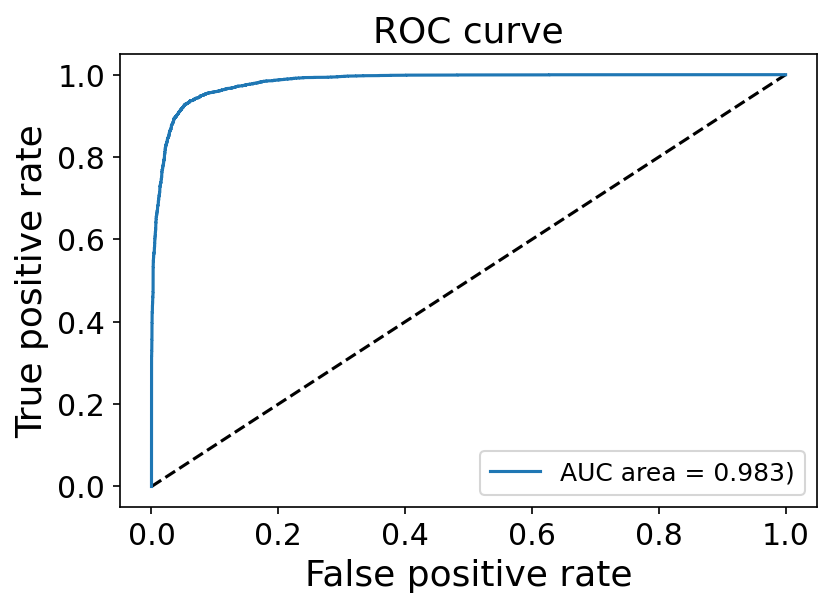

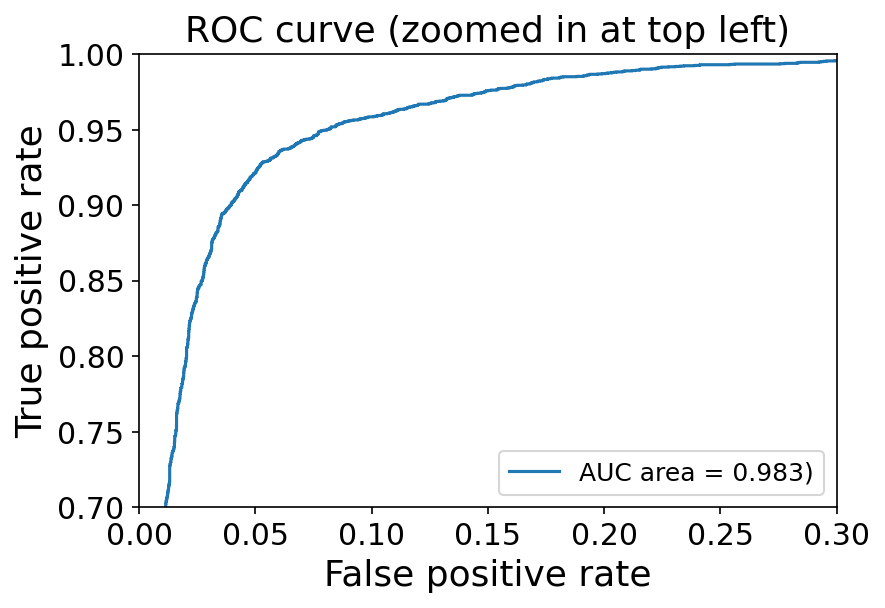

In [52]:
func_dl.draw_loss_accuracy_curves(history, project_name)
func_dl.confusion_matrix(model, test_img, test_label, nClasses)
fpr, tpr, thresholds, auc = func_dl.pred_roc_data(model, test_img, test_label)
func_dl.draw_single_roc_curve(tpr, fpr, auc)

- Secondly, Once your model has converged on our train data, we unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate.

In [53]:
print("Fine tuning by MobileNet_v1 model ...")
batch_size = 32
epochs = 10
model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"

base_model.trainable=True
model.summary()

Fine tuning by MobileNet_v1 model ...
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [54]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy', metrics=['accuracy', func_dl.f1_m, func_dl.precision_m, func_dl.recall_m])

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc])
## easy to exhaust the memory by using "validation_split = 0.2"
print("\n")
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)

Epoch 1/10
413/413 [==============================] - ETA: 0s - loss: 0.0824 - accuracy: 0.9721 - f1_m: 0.9721 - precision_m: 0.9725 - recall_m: 0.9718
Epoch 00001: val_accuracy improved from -inf to 0.92344, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5
413/413 [==============================] - 80s 194ms/step - loss: 0.0824 - accuracy: 0.9721 - f1_m: 0.9721 - precision_m: 0.9725 - recall_m: 0.9718 - val_loss: 0.2064 - val_accuracy: 0.9234 - val_f1_m: 0.9234 - val_precision_m: 0.9238 - val_recall_m: 0.9230
Epoch 2/10
413/413 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9746 - f1_m: 0.9746 - precision_m: 0.9747 - recall_m: 0.9745
Epoch 00002: val_accuracy improved from 0.92344 to 0.92753, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5
413/413 [==============================] - 80s 


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup


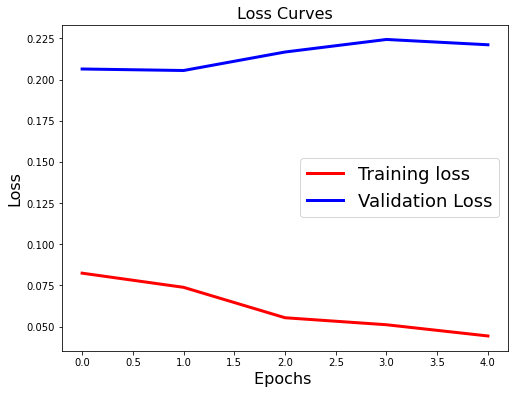

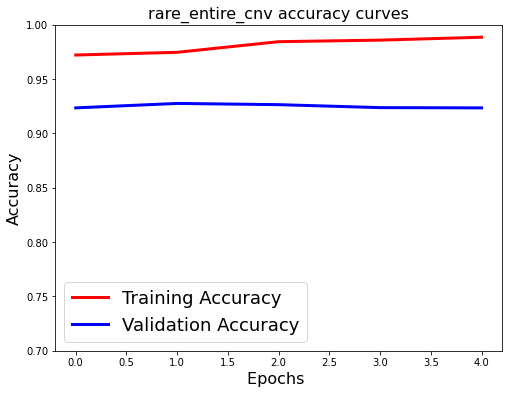

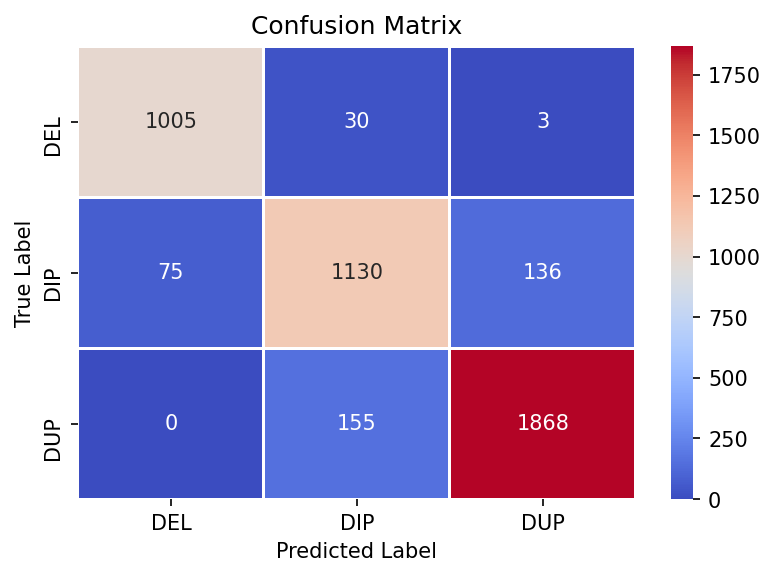


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1038
           1       0.86      0.84      0.85      1341
           2       0.93      0.92      0.93      2023

    accuracy                           0.91      4402
   macro avg       0.91      0.91      0.91      4402
weighted avg       0.91      0.91      0.91      4402



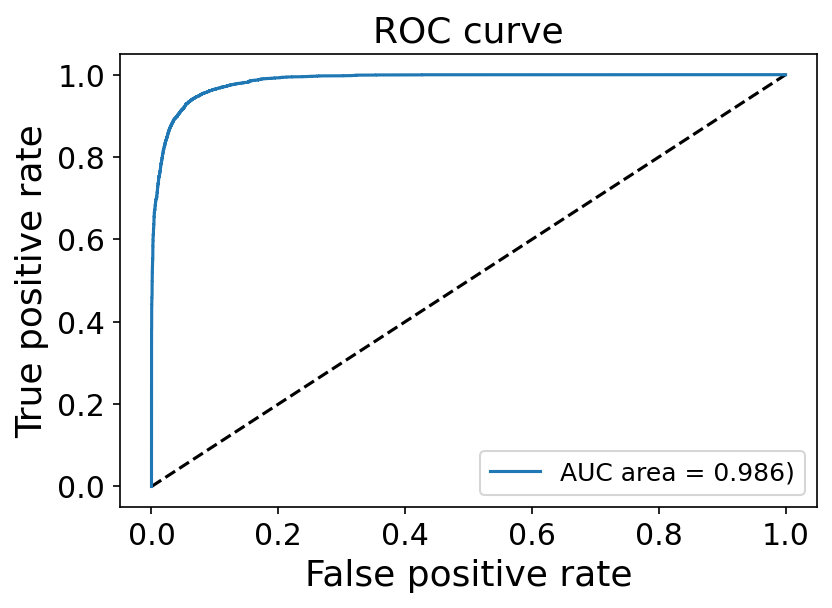

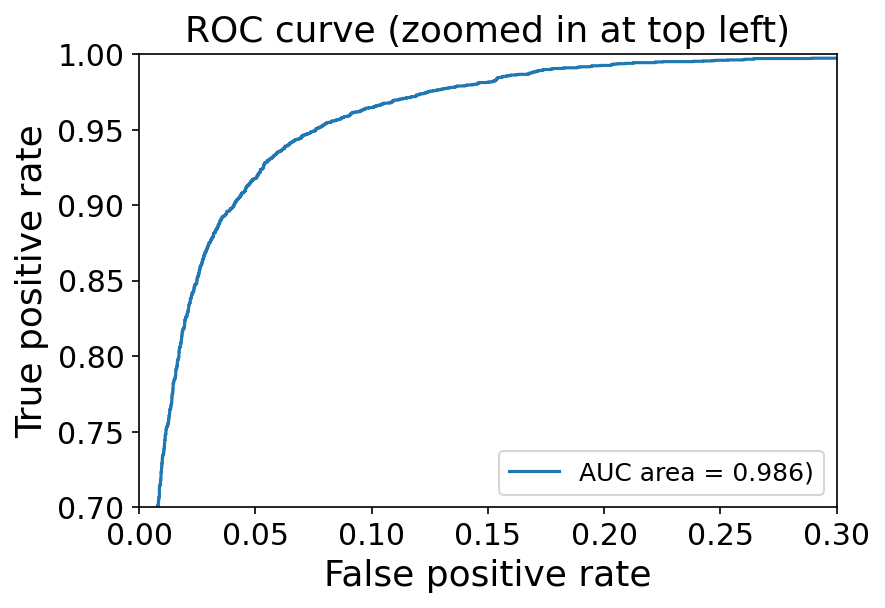

In [56]:
func_dl.draw_loss_accuracy_curves(history, project_name)
func_dl.confusion_matrix(model, test_img, test_label, nClasses)
fpr, tpr, thresholds, auc = func_dl.pred_roc_data(model, test_img, test_label)
func_dl.draw_single_roc_curve(tpr, fpr, auc)

## K-fold cross validation

In [218]:
model_dir = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/'
model_name='MobileNet_v1'

seed = 6666
num_folds = 5
# Define the K-fold Cross Validator
#kfold = KFold(n_splits=num_folds, shuffle=True)
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [ ]:
VALIDATION_ACCURACY, VALIDATION_LOSS = [], []
tpr_list, tpr_interp_list, fpr_list, auc_list = [], [], [], []
mean_fpr = np.linspace(0, 1, 100)

nClasses = 3

# K-fold Cross Validation model evaluation

train_val_img, test_img, train_val_label, test_label = train_test_split(combined_img,
                                                                      combined_label,
                                                                      test_size=0.2,
                                                                      shuffle=True,
                                                                      random_state=seed)
test_label_one_hot = to_categorical(test_label)

fold_num = 0
for train_index, val_index in kfold.split(train_val_img, train_val_label):
    print('------------------------------------------------------------------------')
    func.showDateTime()
    print('Training for fold %d ...'%fold_num)
    print("num_index",len(train_index), len(val_index))
   
    train_img  = train_val_img[train_index]
    train_label_one_hot = to_categorical(train_val_label[train_index])
    
    val_img  = train_val_img[val_index]
    val_label_one_hot = to_categorical(train_val_label[val_index])
    
#     train_img, val_img, train_label_one_hot, val_label_one_hot = train_test_split(train_val_img,
#                                                                   train_val_label_one_hot,
#                                                                   test_size=0.25,
#                                                                   shuffle=True,
#                                                                   random_state=seed)
    
    print("Combined:", combined_img.shape, combined_label_one_hot.shape)
    print("Train:", train_img.shape, train_label_one_hot.shape)
    print("Validation:", val_img.shape, val_label_one_hot.shape)
    print("Test:", test_img.shape, test_label_one_hot.shape)
    
    # CREATE and COMPILE NEW MODEL
    model_name='MobileNet_v1'
    print("Model name: %s"%model_name)
    model = func_dl.cnn_model(model_name, nClasses)
    
    model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses)+ "classes_fold" +str(fold_num)+"_0221.h5"
    
    # CREATE CALLBACKS
    batch_size = 32
    epochs = 50
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    checkpoint = ModelCheckpoint(model_file,
                         monitor='val_accuracy',
                         mode='max', 
                         verbose=1, 
                         save_best_only=True)
    callbacks_list = [checkpoint]
    
    # FIT THE MODEL
    print("Fit the model ...")
    history = model.fit(train_img, train_label_one_hot,
                        batch_size=batch_size, 
                        epochs=epochs, verbose=1, 
                        validation_data=(val_img, val_label_one_hot), 
                        callbacks=[es, checkpoint])
    ## easy to exhaust the memory by using "validation_split = 0.2"

    # LOAD BEST MODEL to evaluate the performance of the model
    print("Load weights...")
    model.load_weights(model_file)

    print("Evaluate ...")
    results = model.evaluate(test_img, test_label_one_hot)
    results = dict(zip(model.metrics_names,results))
    print(results)
    
    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])
    
    fpr_roc, tpr_roc, thresholds_roc, auc_roc = func_dl.pred_roc_data(model, test_img, test_label_one_hot)    

    interp_tpr = np.interp(mean_fpr, fpr_roc, tpr_roc)
    interp_tpr[0] = 0.0
    
    tpr_list.append(tpr_roc)
    tpr_interp_list.append(interp_tpr)
    fpr_list.append(fpr_roc)
    auc_list.append(auc_roc)
    
    tf.keras.backend.clear_session()
    fold_num += 1

------------------------------------------------------------------------
[2021.02.21-11:23:20]
Training for fold 0 ...
num_index 14084 3522
Combined: (22008, 224, 224, 3) (22008, 3)
Train: (14084, 224, 224, 3) (14084, 3)
Validation: (3522, 224, 224, 3) (3522, 3)
Test: (4402, 224, 224, 3) (4402, 3)
Model name: MobileNet_v1
Fit the model ...
Epoch 1/50
441/441 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.8407 - f1_m: 0.8220 - precision_m: 0.8455 - recall_m: 0.8073
Epoch 00001: val_accuracy improved from -inf to 0.88870, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold0_0221.h5
441/441 [==============================] - 79s 179ms/step - loss: 0.4566 - accuracy: 0.8407 - f1_m: 0.8220 - precision_m: 0.8455 - recall_m: 0.8073 - val_loss: 0.3443 - val_accuracy: 0.8887 - val_f1_m: 0.8850 - val_precision_m: 0.8860 - val_recall_m: 0.8840
Epoch 2/50
440/441 [============================>.] - E

Number of folds: 5
ROC curve output plot to: /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_roc_curve.png


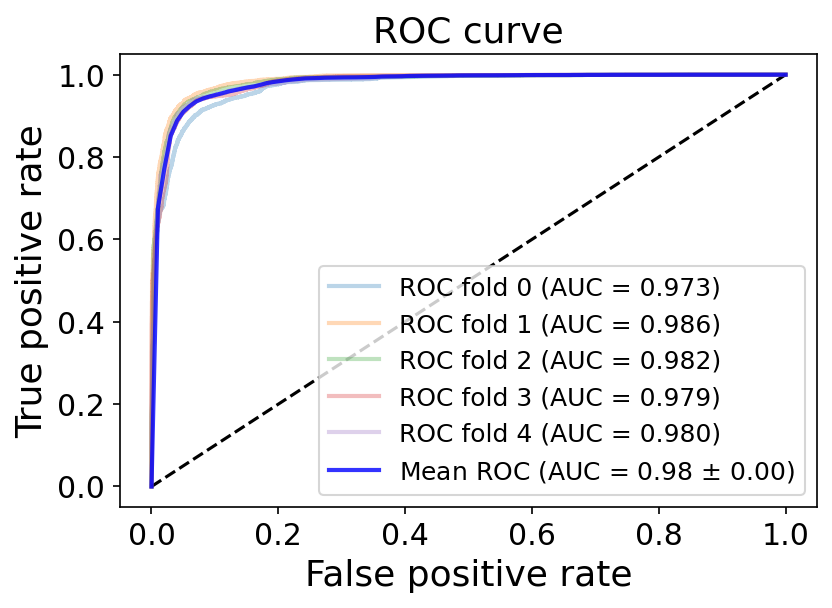

[2021.02.21-20:02:54]
Zoomed ROC curve output plot to: /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5rare_entire_cnv_MobileNet_v1_roc_curve_zoom.png


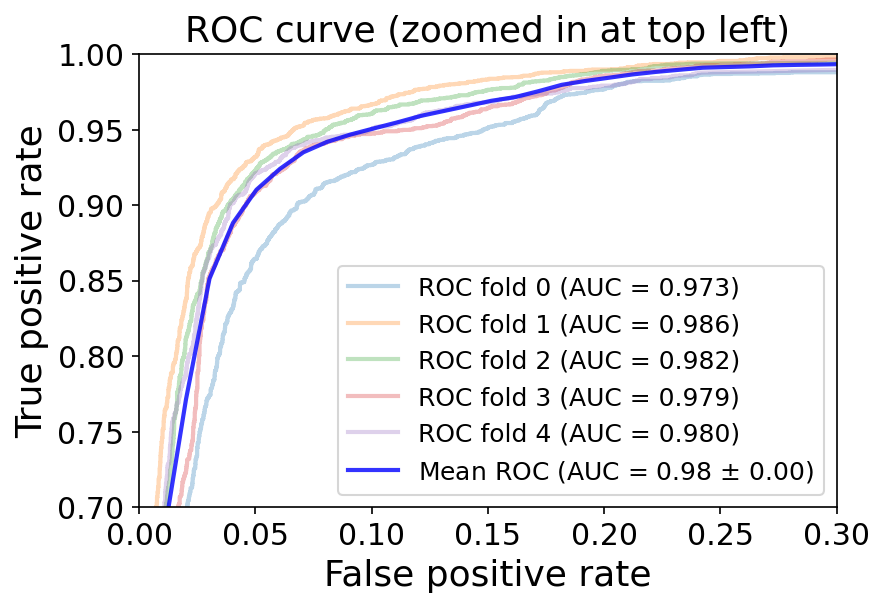

In [220]:
output_image_file = model_dir + project_name + "_" + model_name + "_roc_curve.png"
func_dl.draw_kfold_roc_curve(tpr_list, tpr_interp_list, fpr_list, auc_list, output_image_file)


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup


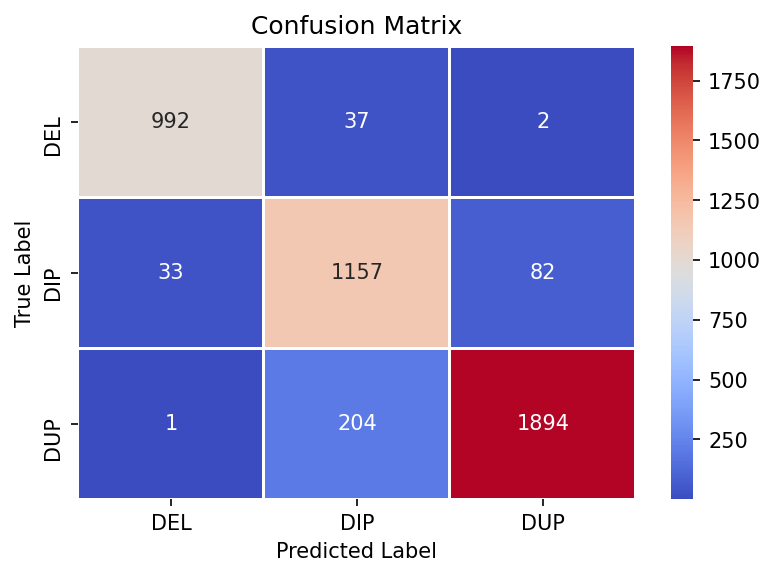


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1031
           1       0.83      0.91      0.87      1272
           2       0.96      0.90      0.93      2099

    accuracy                           0.92      4402
   macro avg       0.92      0.92      0.92      4402
weighted avg       0.92      0.92      0.92      4402



In [221]:
model_file = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold1_0221.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}

model = keras.models.load_model(model_file, custom_objects=custom_objects)
func_dl.confusion_matrix(model, test_img, test_label, nClasses=3)

## Result analysis
### Check the predict performance in different target numbers categories

In [ ]:
min_win = 3
max_win = 4
selected_test_df, selected_test_img, selected_test_label = func_dl.fetch_df_by_wins(test_cnv_info_df, test_img, test_label, min_win, max_win)

index                                                                      21068
Unnamed: 0                                                                 21068
CHR                                                                            1
PRED_START                                                              46609654
PRED_END                                                                46615076
TYPE                                                                         DUP
SAMPLE                                                                 SP0121823
CANOES_RT                                                                      0
CLAMMS_RT                                                                      0
XHMM_RT                                                                        1
NUM_OVERLAPS_RT                                                                1
RD_PROP_RT                                                                  3.85
GC                          

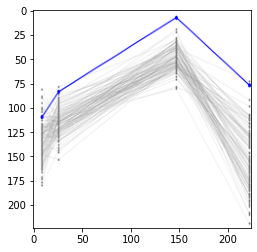

In [172]:
print(selected_test_df.iloc[0,:])
print(selected_test_label[0])
func_dl.showImg(selected_test_img[0])

In [16]:
test_img.shape, test_label.shape, test_cnv_info_df.shape

((4402, 224, 224, 3), (4402, 3), (4402, 22))

In [17]:
model_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}
model = keras.models.load_model(model_path, custom_objects=custom_objects)

loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)

138/138 [==============================] - 5s 36ms/step - loss: 0.2477 - accuracy: 0.9098 - f1_m: 0.9095 - precision_m: 0.9103 - recall_m: 0.9087


In [18]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)

Processing num_windows: 2-2 ...
There is/are 11 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 202 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 700 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 667 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 457 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 296 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 215 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 188 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 179 CNVs with number of targets/windows between 10 and 10.


In [19]:
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

Processing num_windows: 11-15 ...
There is/are 515 CNVs with number of targets/windows between 11 and 15.
Processing num_windows: 16-20 ...
There is/are 305 CNVs with number of targets/windows between 16 and 20.
Processing num_windows: 21-50 ...
There is/are 505 CNVs with number of targets/windows between 21 and 50.
Processing num_windows: 51-100 ...
There is/are 112 CNVs with number of targets/windows between 51 and 100.
Processing num_windows: 101-600 ...
There is/are 50 CNVs with number of targets/windows between 101 and 600.


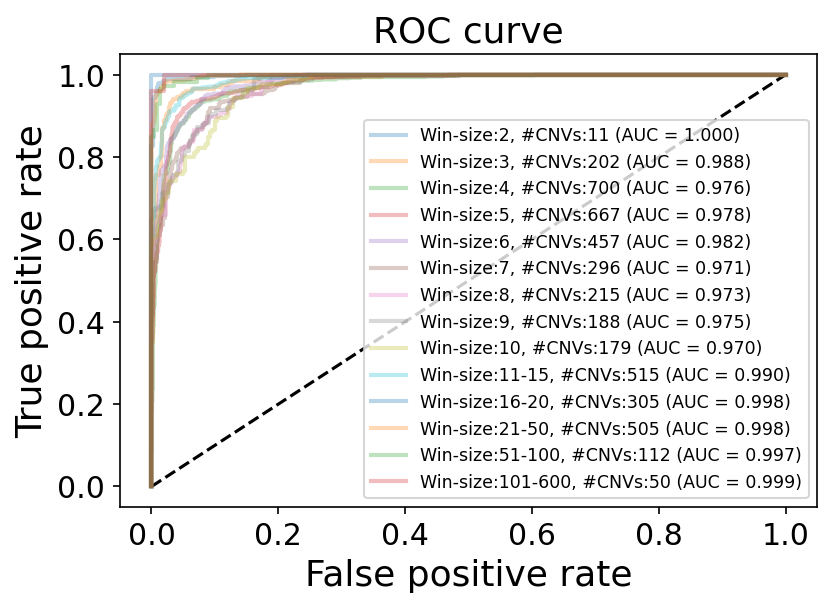

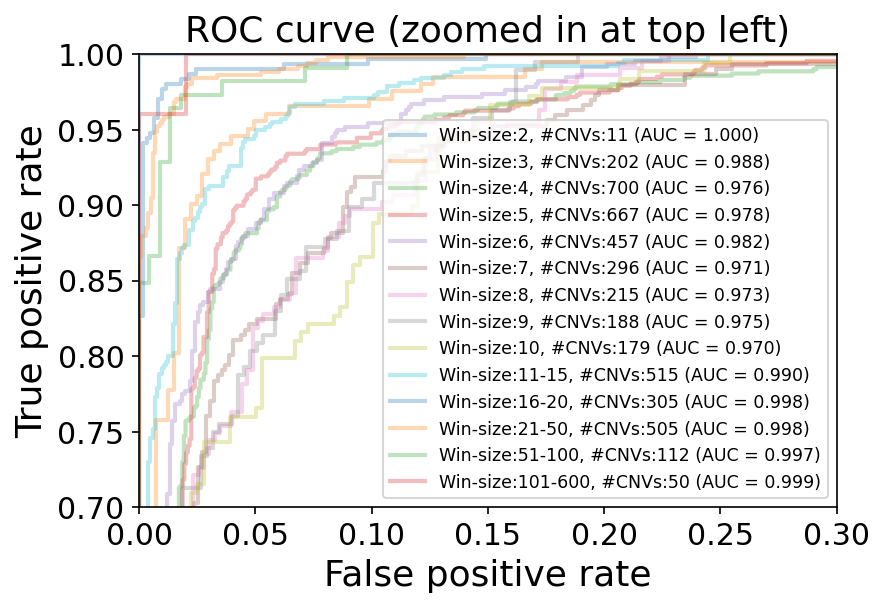

In [21]:
func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

###  Check the prediction performace by del and dup seperately

In [250]:
#test_cnv_info_df = test_cnv_info_df.reset_index()

In [282]:
test_del_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DEL'].index
test_del_cnv_info_df = test_cnv_info_df.iloc[test_del_index]
test_del_img = test_img[test_del_index]
test_del_label = test_label[test_del_index]

In [251]:
test_dup_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DUP'].index
test_dup_cnv_info_df = test_cnv_info_df.iloc[test_dup_index]
test_dup_img = test_img[test_dup_index]
test_dup_label = test_label[test_dup_index]

In [283]:
test_dup_cnv_info_df.shape, test_del_cnv_info_df.shape

Tensorflow version 2.2.0


((3155, 24), (1247, 24))

- Deletion

In [284]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

Processing num_windows: 2-2 ...
There is/are 2 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 149 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 176 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 148 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 92 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 65 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 61 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 60 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 141 CNVs with number of targets/windo

- Duplication

Processing num_windows: 2-2 ...
There is/are 9 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 551 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 491 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 309 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 204 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 150 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 127 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 119 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 374 CNVs with number of targets/w

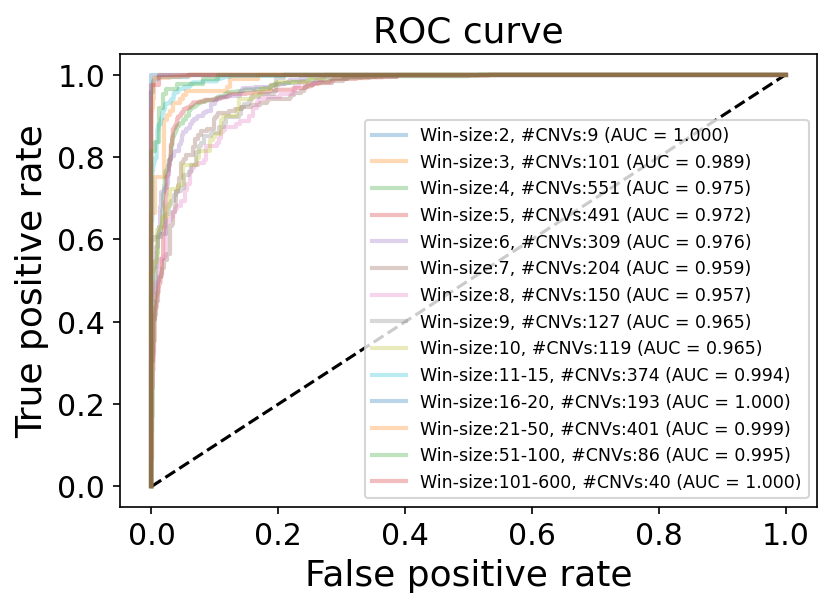

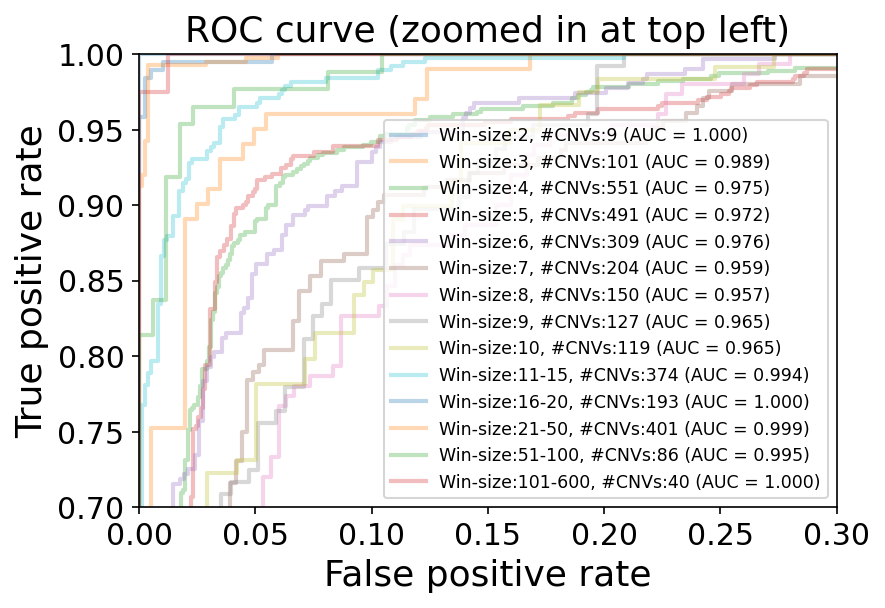

In [286]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

### Predict the same test data by split CNV trained model

In [18]:
split_model_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_split_cnv_3classes_MobileNet_v1_3classes_fold3.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}
split_model = keras.models.load_model(split_model_path, custom_objects=custom_objects)

In [19]:
split_model.evaluate(test_img, test_label)

138/138 [==============================] - 5s 40ms/step - loss: 0.4433 - accuracy: 0.7924 - f1_m: 0.7927 - precision_m: 0.7941 - recall_m: 0.7913


[0.44326913356781006,
 0.7923671007156372,
 0.7926908731460571,
 0.7941120266914368,
 0.7913143634796143]

In [20]:
test_cnv_info_df.shape, test_img.shape, test_label.shape

((4402, 22), (4402, 224, 224, 3), (4402, 3))

Processing num_windows: 2-2 ...
There is/are 11 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 202 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 700 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 667 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 457 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 296 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 215 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 188 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 179 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 515 CNVs with number of targets/

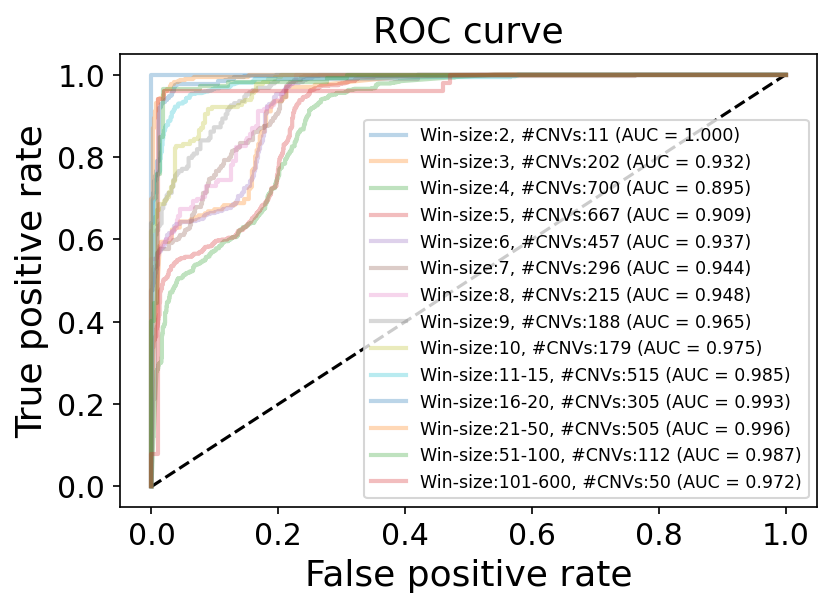

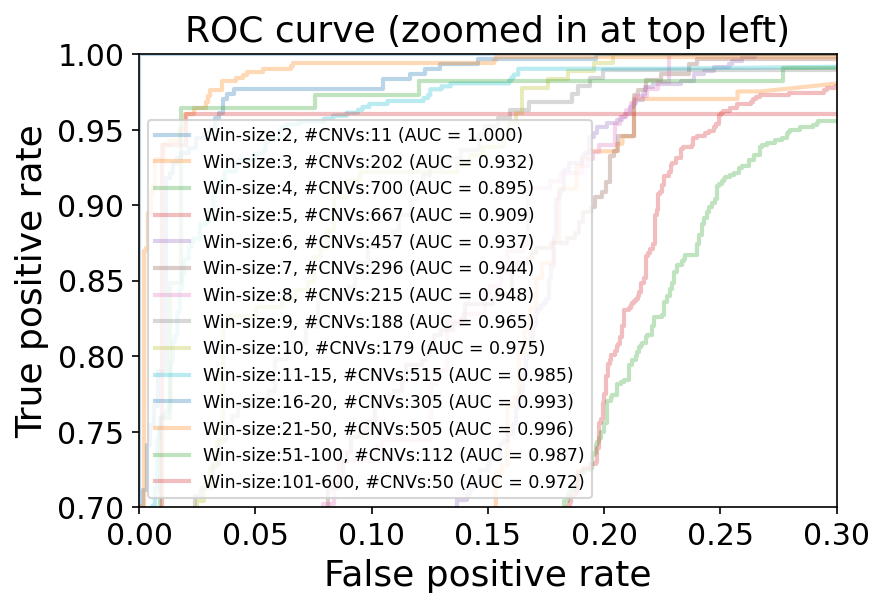

In [21]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

- **Deletion and duplication split models**

In [22]:
test_cnv_info_df.shape, test_img.shape, test_label.shape

((4402, 22), (4402, 224, 224, 3), (4402, 3))

In [23]:
test_cnv_info_df = test_cnv_info_df.reset_index(drop=True)

In [24]:
test_del_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DEL'].index
test_del_cnv_info_df = test_cnv_info_df.iloc[test_del_index]
test_del_img = test_img[test_del_index]
test_del_label = test_label[test_del_index]

test_del_cnv_info_df.shape, test_del_img.shape, test_del_label.shape 

((1247, 22), (1247, 224, 224, 3), (1247, 3))

In [25]:
test_dup_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DUP'].index
test_dup_cnv_info_df = test_cnv_info_df.iloc[test_dup_index]
test_dup_img = test_img[test_dup_index]
test_dup_label = test_label[test_dup_index]

test_dup_cnv_info_df.shape, test_dup_img.shape, test_dup_label.shape 

((3155, 22), (3155, 224, 224, 3), (3155, 3))

In [80]:
## Transfer the label from 3 classes to 2 classes.

test_del_list, test_dup_list = [], []
for reader in test_del_label:
    if np.array_equal(reader, [0,1,0]): # when label = 1 in three classes as false del
        test_del_list.append([1,0])     # then transfer to 0 in two classes as false del
    elif np.array_equal(reader, [1,0,0]): # when label = 0 in three classes as true del
        test_del_list.append([0,1])       # then transfer to 1 in two classes as true del
test_del_label_one_hot = np.array(test_del_list)

for reader in test_dup_label:
    if np.array_equal(reader, [0,0,1]): #label=2
        test_dup_list.append([0,1])     # label to 1, true
    elif np.array_equal(reader, [0,1,0]): # when label=1
        test_dup_list.append([1,0])       # transfer to 0, false
test_dup_label_one_hot = np.array(test_dup_list)

In [81]:
test_dup_label.shape

(3155, 3)

In [82]:
test_del_label_one_hot.shape, test_dup_label_one_hot.shape

((1247, 2), (3155, 2))

In [28]:
## Deletion
split_del_model_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_split_del_2classes_MobileNet_v1_fine-tuning_2classes.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}


model = keras.models.load_model(split_del_model_path, custom_objects=custom_objects)
loss, accuracy, f1_score, precision, recall = model.evaluate(test_del_img, test_del_label_one_hot)

39/39 [==============================] - 1s 36ms/step - loss: 0.3869 - accuracy: 0.8709 - f1_m: 0.8707 - precision_m: 0.8707 - recall_m: 0.8707


Tensorflow version 2.2.0
Processing num_windows: 2-2 ...
There is/are 2 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 149 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 176 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 148 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 92 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 65 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 61 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 60 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 141 CNVs wit

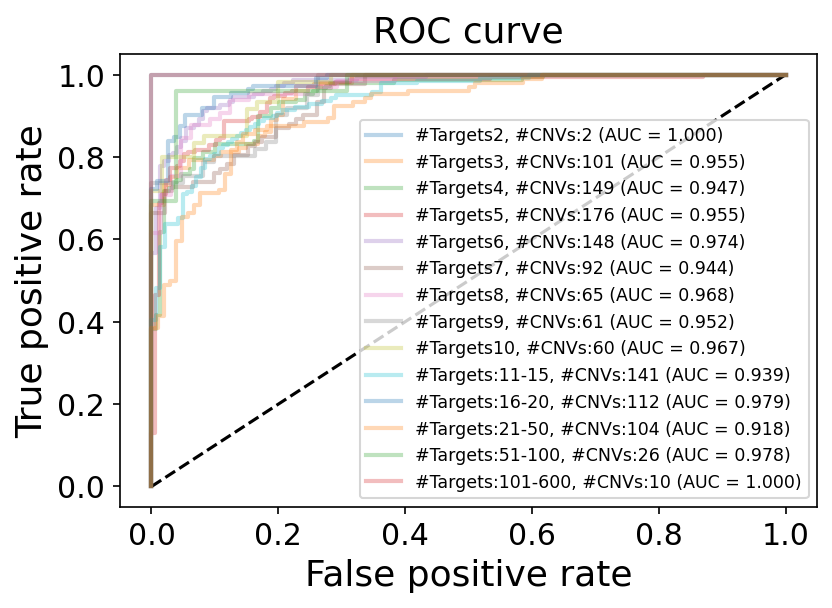

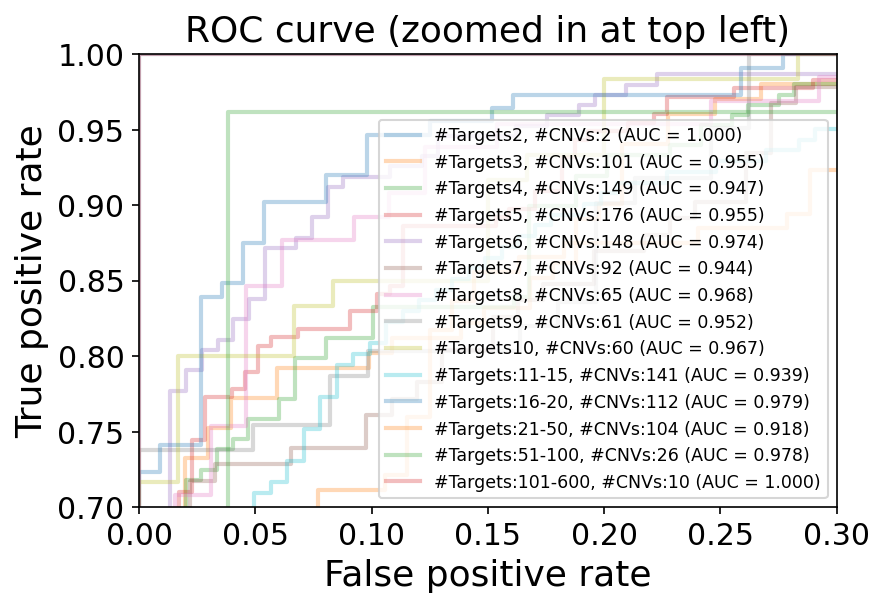

In [31]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

In [83]:
## Duplication

split_dup_model_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_split_dup_2classes_MobileNet_v1_fine-tuning_2classes.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}


model = keras.models.load_model(split_dup_model_path, custom_objects=custom_objects)
loss, accuracy, f1_score, precision, recall = model.evaluate(test_dup_img, test_dup_label_one_hot)

99/99 [==============================] - 3s 32ms/step - loss: 0.3778 - accuracy: 0.8307 - f1_m: 0.8312 - precision_m: 0.8312 - recall_m: 0.8312


Processing num_windows: 2-2 ...
There is/are 9 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 551 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 491 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 309 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 204 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 150 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 127 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 119 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 374 CNVs with number of targets/w

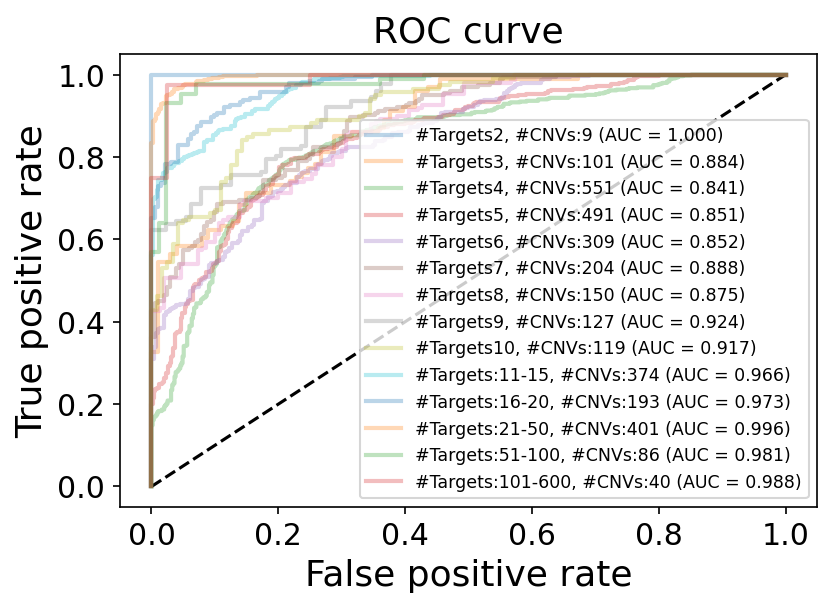

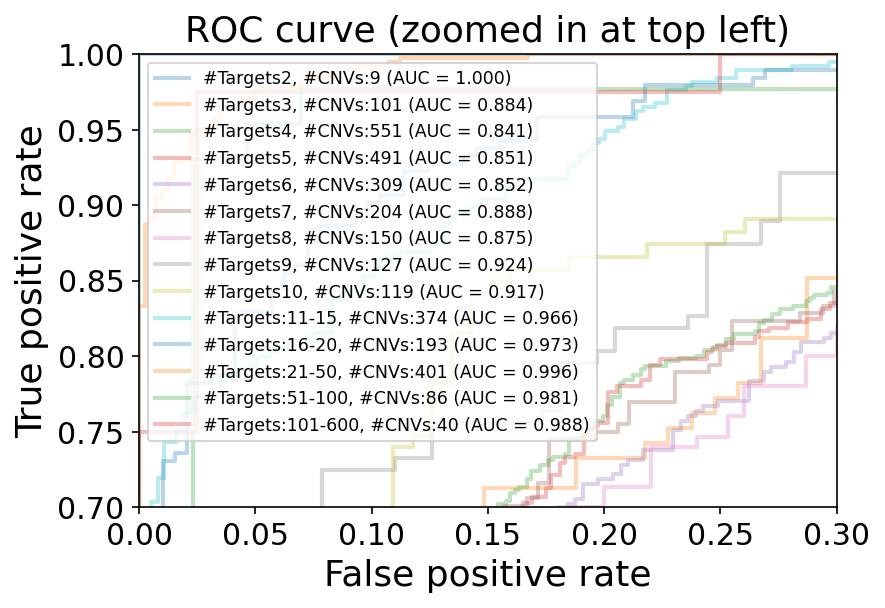

In [84]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)
test_dup_cnv_info_df
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

### Performance on PCGC experimental results

In [4]:
pcgc_prediction_file = '/home/rt2776/cnv_espresso/predict_pcgc/pcgc_NimbleGenV2_data_prediction_0223.csv'
pcgc_prediction_df = pd.read_csv(pcgc_prediction_file)
pcgc_prediction_df

,ID,Chr,Start,End,Band,CNV_TYPE,Syndrome_or_Gene,AnalysisObserved†,CardiacLesion(Diagnosis),ParentOrigin,...,Size_kb,ref,batch,Num_Targets_Wins,entire_cnv_path,split_cnv_path,Prob_True,Prob_False,Prediction,Pred_status
0,1-01401,1,59247993,59251097,p32.1,1,JUN,A,LVOT(HLHS),-,...,3.1,hg19,NimbleGenV2,1,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN,NaN
1,1-03171,1,145586403,145799634,q21.1,3,"1q21.1,dup_or_GJA5‡","A,E",CTD(TOF_or_APVS),-,...,213.2,hg19,NimbleGenV2,50,/home/rt2776/cnv_espresso/predict_pcgc/images_...,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN
2,1-01036,1,146631133,147416212,q21.1,3,"1q21.1,dup_or_GJA5‡",E,CTD(TOF),M,...,785.1,hg19,NimbleGenV2,75,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN,NaN
3,1-01486,1,194201171,194304070,q24.2–q25,3,CDC73,A,LVOT(HLHS),-,...,102.9,hg19,NimbleGenV2,0,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN,NaN
4,1-01536,2,70168995,70359345,p13.3,1,PCBP1,A,CTD(TOF_or_PA),-,...,190.4,hg19,NimbleGenV2,4,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN,NaN
5,1-01401,2,102493466,103001458,q11.2–q12.1,1,MAP4K4,E,LVOT(HLHS),-,...,508.0,hg19,NimbleGenV2,52,/home/rt2776/cnv_espresso/predict_pcgc/images_...,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN
6,1-01401,2,145155868,145274931,q22.3,1,Mowat-Wilson_or_ZEB2‡,E,LVOT(HLHS),-,...,119.1,hg19,NimbleGenV2,9,/home/rt2776/cnv_espresso/predict_pcgc/images_...,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN
7,1-00762,3,60661,11712230,p26.1,3,"ARL8B,ARPC4,CAMK1,CAV3,CRBN,EMC3,ITPR1,SEC13,S...",A,ASD_or_PS(ASD),-,...,11651.6,hg19,NimbleGenV2,664,/home/rt2776/cnv_espresso/predict_pcgc/images_...,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN
8,1-01049,3,15637812,15643461,p25.1,3,"BTD,HACL1",E,CTD(TOF),-,...,5.6,hg19,NimbleGenV2,4,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN,NaN
9,1-01045,3,47780965,48309270,p21.31,3,"CDC25A,DHX30,MAP4,SMARCC1",A,LVOT(HLHS),-,...,528.3,hg19,NimbleGenV2,69,/home/rt2776/cnv_espresso/predict_pcgc/images_...,NaN,NaN,NaN,NaN,NaN


## Reference:
- Load image: https://keras.io/api/preprocessing/image/#load_img-function
- Model example: https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529
- Transfer learning and toy demo: https://zhuanlan.zhihu.com/p/51889181
- Transfer learning and fine tune: 
    - 讲解：https://zhuanlan.zhihu.com/p/26693647
    - 官方教程：https://www.geek-book.com/src/docs/keras/keras/keras.io/guides/transfer_learning/index.html
- K-fold validation: https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538
- ROC curve: https://medium.com/hackernoon/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a
- F1 score: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model